In [0]:
!pip install transformers

     |████████████████████████████████| 501kB 2.8MB/s 
     |████████████████████████████████| 870kB 49.9MB/s 
     |████████████████████████████████| 1.0MB 43.2MB/s 
     |████████████████████████████████| 3.7MB 39.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=e2b3bf3c5ea52d82b2ab77401f7f9317b8b6ac05b712440354c5e6ae4f58b8cc
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses


In [0]:
import torch
from transformers import *

In [0]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

## BERT has about 30000 tokens. I am trying to uderstand how these tokens are enough to collectively understand enough english to perform well on tasks such as GLUE, SuperGlue.

In [0]:
with open('Vocab.txt','w') as f:
  for token in tokenizer.vocab.keys():
    f.write(token + '\n')

###[PAD],[UNK],[CLS],[SEP],[MASK] the usual token used in tasks involving language.
###There are 993 words which are called unused.
###BertTokenizers have tokens for single characters as well.

In [0]:
single_char=[]
single_char_hash=[]
for token in tokenizer.vocab.keys():
  if (len(token)==1):
    single_char.append(token)
  if ( len(token)==3 and token[:2]=='##'):
    single_char_hash.append(token[-1])

    

In [0]:
print("Total number of single character tokens precedded by a hash {}".format(len(single_char_hash)))
for i in range(0,len(single_char_hash),50):
  limit=min(i+40,len(single_char)+1)
  print(' '.join(single_char_hash[i:limit]) )

Total number of single character tokens precedded by a hash 997
s a e i n o d r y t l m u h k c g p 2 z 1 b 3 f 4 6 7 x v 8 5 9 0 w j q ° ₂ а и
е د ن ν ø р ₄ ₀ ر я ³ ι ł н ᵢ ₙ ß ة ς م − т ː ل ь к ♭ η ی в ا × ¹ ы ה ɛ л ! " #
. / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ® ± ´ µ ¶ · º » ¼
ƒ ɐ ɑ ɒ ɔ ɕ ə ɡ ɣ ɨ ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ
θ κ λ μ ξ ο π ρ σ τ υ φ χ ψ ω б г д ж з м п с у ф х ц ч ш щ ъ э ю ђ є і ј љ њ ћ
հ մ յ ն ո պ ս վ տ ր ւ ք ־ א ב ג ד ו ז ח ט י ך כ ל ם מ ן נ ס ע ף פ ץ צ ק ר ש ת ،
ش ص ض ط ظ ع غ ـ ف ق ك و ى ٹ پ چ ک گ ں ھ ہ ے अ आ उ ए क ख ग च ज ट ड ण त थ द ध न प
ह ा ि ी ो । ॥ ং অ আ ই উ এ ও ক খ গ চ ছ জ ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া
ம ய ர ல ள வ ா ி ு ே ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད
ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ ᄋ ᄌ ᄎ ᄏ ᄐ ᄑ ᄒ ᅡ ᅢ ᅥ ᅦ ᅧ ᅩ ᅪ ᅭ ᅮ
ᆼ ᴬ ᴮ ᴰ ᴵ ᴺ ᵀ ᵃ ᵇ ᵈ ᵉ ᵍ ᵏ ᵐ ᵒ ᵖ ᵗ ᵘ ᵣ ᵤ ᵥ ᶜ ᶠ ‐ ‑ ‒ – — ― ‖ ‘ ’ ‚ “ ” „ † ‡ • …
⁶ ⁷ ⁸ ⁹ ⁻ ⁿ ₅ ₆ ₇ ₈ ₉ ₊ ₍ ₎ ₐ ₑ ₒ ₓ ₕ ₖ ₗ ₘ ₚ ₛ ₜ ₤ ₩ € 

In [0]:
print("Total number of single character tokens {}\n".format(len(single_char)))
for i in range(0,len(single_char),50):
  limit=min(i+40,len(single_char)+1)
  print(' '.join(single_char[i:limit]) )

Total number of single character tokens 997

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ [ \ ] ^ _ ` a b
m n o p q r s t u v w x y z { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ® ° ± ² ³ ´ µ ¶ · ¹
÷ ø þ đ ħ ı ł ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɛ ɡ ɣ ɨ ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ
ˈ ː ˡ ˢ ˣ ˤ α β γ δ ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω а б в г д е ж з и
ф х ц ч ш щ ъ ы ь э ю я ђ є і ј љ њ ћ ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ
ט י ך כ ל ם מ ן נ ס ע ף פ ץ צ ק ר ש ת ، ء ا ب ة ت ث ج ح خ د ذ ر ز س ش ص ض ط ظ ع
ى ي ٹ پ چ ک گ ں ھ ہ ی ے अ आ उ ए क ख ग च ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स
ই উ এ ও ক খ গ চ ছ জ ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப
ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད ན པ བ མ འ ར ལ ས မ ა
ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ ᄋ ᄌ ᄎ ᄏ ᄐ ᄑ ᄒ ᅡ ᅢ ᅥ ᅦ ᅧ ᅩ ᅪ ᅭ ᅮ ᅯ ᅲ ᅳ ᅴ ᅵ ᆨ ᆫ ᆯ ᆷ ᆸ
ᵉ ᵍ ᵏ ᵐ ᵒ ᵖ ᵗ ᵘ ᵢ ᵣ ᵤ ᵥ ᶜ ᶠ ‐ ‑ ‒ – — ― ‖ ‘ ’ ‚ “ ” „ † ‡ • … ‰ ′ ″ › ‿ ⁄ ⁰ ⁱ ⁴
₂ ₃ ₄ ₅ ₆ ₇ ₈ ₉ ₊ ₍ ₎ ₐ ₑ ₒ ₓ ₕ ₖ ₗ ₘ ₙ ₚ ₛ ₜ ₤ ₩ € ₱ ₹ ℓ № ℝ ™ ⅓ ⅔ ← ↑ → ↓

In [0]:
set(single_char)==set(single_char_hash)

True

# Statistics on the length of tokens


In [0]:
length=[]
for token in tokenizer.vocab.keys():
  length.append(len(token))

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Text(0.5, 0, 'Character length')

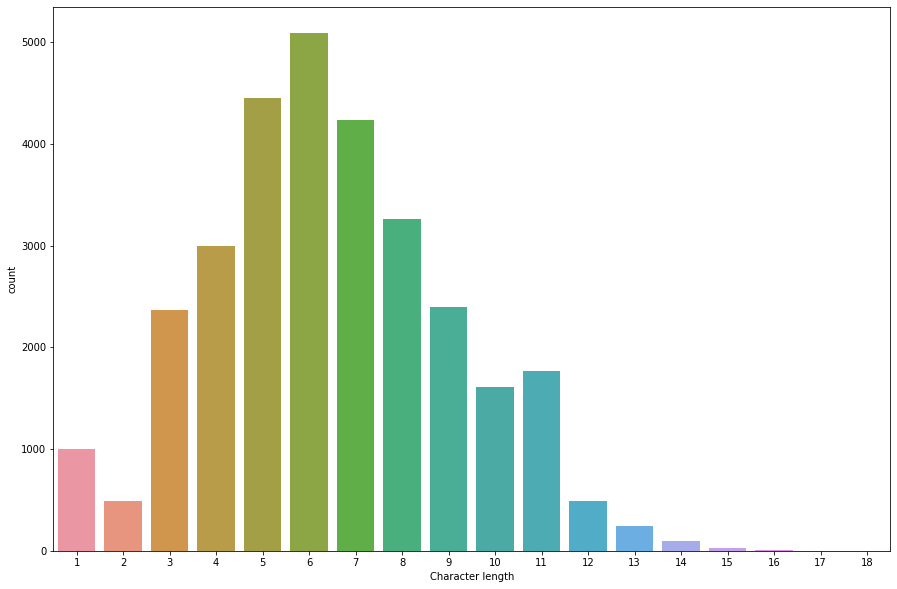

In [0]:
plt.figure(figsize=(15,10))
sns.countplot(length)
plt.xlabel("Character length")

# Checking the number of words that have a length greater than 3 and begin with hashes

In [0]:
hash_words=[]
hash_words_length=[]
with open('Hash_words.txt','w') as f:
  for token in tokenizer.vocab.keys():
    if ( len(token)>3 and token[:2]=='##'):
      hash_words.append(token[2:])
      f.write(token[2:] + '\n')
      hash_words_length.append(len(token[2:]))


# List of Hash words as seem from the text include commonly occuring stringss in the midle and end of a longer word

In [0]:
print("total number of words that begin with hash {}".format(len(hash_words)))

total number of words that begin with hash 4831


Text(0.5, 0, 'word length')

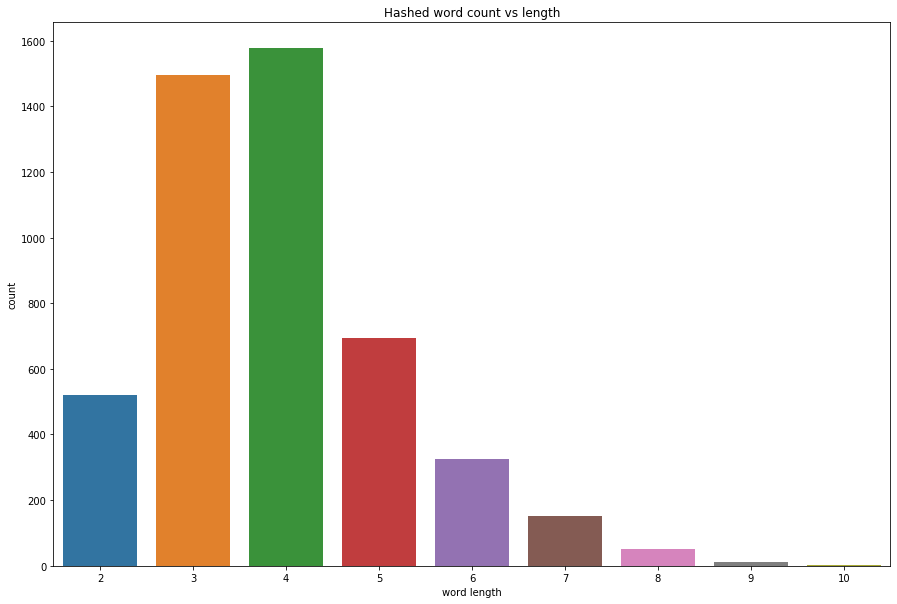

In [0]:
plt.figure(figsize=(15,10))
sns.countplot(hash_words_length)
plt.title("Hashed word count vs length")
plt.xlabel("word length")

#Trying to check the number of sur-names in the vocabulary

In [0]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/jasoriya/CS6120-PS2-support/master/data/surnames/surnames_with_splits.csv')

In [0]:
print("the total number os surnames in this file are {}".format(len(set(df.surname.values))))

the total number os surnames in this file are 9041


In [0]:
count=0
for i in set(df.surname.values):
  if i in set(tokenizer.vocab.keys()):
    count+=1

In [0]:
print("The nubmer of surnames present in the vocabulary are {}".format(count))

The nubmer of surnames present in the vocabulary are 15


# Finding the tokens that are digits?


In [0]:
digit=[]
for token in tokenizer.vocab.keys():
  if token.isdigit():
    digit.append(token)

In [0]:
print("The nubmer of digits present in the vocabulary are {}".format(len(digit)))

The nubmer of digits present in the vocabulary are 881


#Example of how BERT encodes a sentence

In [0]:
input_ids = torch.tensor(tokenizer.encode("Damodar is from a rural village named Ghunttur. He sells jaberwakki oil everyday at the market.", add_special_tokens=True)).unsqueeze(0)

In [0]:
for inp in input_ids[0]:
  print((int(inp),tokenizer.ids_to_tokens[int(inp)]))
  

(101, '[CLS]')
(5477, 'dam')
(13390, '##oda')
(2099, '##r')
(2003, 'is')
(2013, 'from')
(1037, 'a')
(3541, 'rural')
(2352, 'village')
(2315, 'named')
(1043, 'g')
(17157, '##hun')
(4779, '##tt')
(3126, '##ur')
(1012, '.')
(2002, 'he')
(15187, 'sells')
(14855, 'ja')
(5677, '##ber')
(4213, '##wa')
(24103, '##kki')
(3514, 'oil')
(10126, 'everyday')
(2012, 'at')
(1996, 'the')
(3006, 'market')
(1012, '.')
(102, '[SEP]')


[CLS]- Marks the beginning of the sentence and also the aggregate representations used for classification tasks.

[SEP]- Marks the end of an input

 double Hashtags at the beginning of certain tokens imply that this token is a part of a larger token and isn't present at the beginning of the larger token.

# exploring BERT tokenizers

In [0]:
tokenizer.encode_plus("Damodar is from a rural village named Ghunttur.","He sells jaberwakki oil everyday at the market.", add_special_tokens=True)

{'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'input_ids': [101,
  5477,
  13390,
  2099,
  2003,
  2013,
  1037,
  3541,
  2352,
  2315,
  1043,
  17157,
  4779,
  3126,
  1012,
  12849,
  3683,
  1012,
  102,
  2002,
  15187,
  14855,
  5677,
  4213,
  24103,
  3514,
  10126,
  2012,
  1996,
  3006,
  1012,
  102],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

# "input_ids" refer to the index of the toke in the vocabulary after worpiece tokenization.
# "attention_maks refers to the tokens the model should be attending to during computation its a way of avoind padded tokens"
# "token_type_ids" is to convey to the computer a distinction between 2 sentences.

In [0]:
seq_1="The world is small."
seq_2="Today we live in a world so well connected my by technology that one cannot fathom how virtually close we are while still being physically distant"

In [0]:
print("Length of seq_1 is {} and length of seq_2 is {}".format(len(seq_1.split()),len(seq_2.split())))

Length of seq_1 is 4 and length of seq_2 is 26


In [0]:
encode_1=tokenizer.encode(seq_1)
encode_2=tokenizer.encode(seq_2)
print(encode_1)
print(encode_2)

[101, 1996, 2088, 2003, 2235, 1012, 102]
[101, 2651, 2057, 2444, 1999, 1037, 2088, 2061, 2092, 4198, 2026, 2011, 2974, 2008, 2028, 3685, 6638, 23393, 2129, 8990, 2485, 2057, 2024, 2096, 2145, 2108, 8186, 6802, 102]


In [0]:
encode_1_pad=tokenizer.encode(seq_1,max_length=len(seq_2.split()),pad_to_max_length=True)
print(encode_1_pad) # padded input

[101, 1996, 2088, 2003, 2235, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Value of 0 in the input_tokens indicates padding

In [0]:
tokenizer.encode_plus(seq_1,seq_2)

{'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'input_ids': [101,
  1996,
  2088,
  2003,
  2235,
  1012,
  102,
  2651,
  2057,
  2444,
  1999,
  1037,
  2088,
  2061,
  2092,
  4198,
  2026,
  2011,
  2974,
  2008,
  2028,
  3685,
  6638,
  23393,
  2129,
  8990,
  2485,
  2057,
  2024,
  2096,
  2145,
  2108,
  8186,
  6802,
  102],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

## notice the change in token ids too show a distinction between the two sentences

# The distinction between 2 sentences can be introduced if we use tokenizer.encode_plus specifying the two sentence seperately

In [0]:
tt=tokenizer.encode_plus("Damodar is from a rural village named Ghunttur.Damodar was named after a valley.","He sells jaberwakki oil everyday at the market.", add_special_tokens=True)

[101,
 5477,
 13390,
 2099,
 2003,
 2013,
 1037,
 3541,
 2352,
 2315,
 1043,
 17157,
 4779,
 3126,
 1012,
 5477,
 13390,
 2099,
 2001,
 2315,
 2044,
 1037,
 3028,
 1012,
 102,
 2002,
 15187,
 14855,
 5677,
 4213,
 24103,
 3514,
 10126,
 2012,
 1996,
 3006,
 1012,
 102]

In [0]:
for inp in tt['input_ids']:
  print("id:{}\t\ttoken:{}".format(inp,tokenizer.ids_to_tokens[int(inp)] ))

id:101		token:[CLS]
id:5477		token:dam
id:13390		token:##oda
id:2099		token:##r
id:2003		token:is
id:2013		token:from
id:1037		token:a
id:3541		token:rural
id:2352		token:village
id:2315		token:named
id:1043		token:g
id:17157		token:##hun
id:4779		token:##tt
id:3126		token:##ur
id:1012		token:.
id:5477		token:dam
id:13390		token:##oda
id:2099		token:##r
id:2001		token:was
id:2315		token:named
id:2044		token:after
id:1037		token:a
id:3028		token:valley
id:1012		token:.
id:102		token:[SEP]
id:2002		token:he
id:15187		token:sells
id:14855		token:ja
id:5677		token:##ber
id:4213		token:##wa
id:24103		token:##kki
id:3514		token:oil
id:10126		token:everyday
id:2012		token:at
id:1996		token:the
id:3006		token:market
id:1012		token:.
id:102		token:[SEP]


In [0]:
tokenizer.tokenize("Jabberwakki")

['ja', '##bber', '##wa', '##kki']

# **NOTE**: any word can be tokenized by the BERTtokenizer as it dwelves in words and characters. If a word isn't present in the vocabulary as a whole, if that fails it looks in to subwords and further into individual characters. Thus as long as characters of a word are present in the vocabulary its unlikely that we may have unknown words.

In [0]:
tokenizer.tokenize("jafljhdufuafkaj sdkjhskiy")

['ja',
 '##fl',
 '##j',
 '##hd',
 '##uf',
 '##ua',
 '##fk',
 '##aj',
 'sd',
 '##k',
 '##j',
 '##hs',
 '##ki',
 '##y']

## As mentioned above even the most unlikely word can be tokenized thus the concept of OOV does not exist.


The whole concept of WordPiece embedding comes from the following paper:
https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/37842.pdf

The basic algorithm is as follows:
1. Initial vocabulary consists of the characters from the given training data.
2. Build a language model for your training data using the tokens in the initial vocabulary.
3. Generate a new token by combining any the existing tokens from the vocabulary. Select the combined tokens the increase the likelihood of the language model when added to the model.
4. Go back to 4 until we reach the required target set of vocabulary words.
